# Linear Regression
Reference: https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902

In [2]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mu = []
std = []

def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:,i]))

def load_data(filename):
	df = pd.read_csv(filename, sep=",", index_col=False)
	df.columns = ["housesize", "rooms", "price"]
	data = np.array(df, dtype=float)
	plot_data(data[:,:2], data[:, -1])
	normalize(data)
	return data[:,:2], data[:, -1]

In [4]:
# Linear function
def h(x, theta):
    return np.matmul(x, theta)

# Cost function
def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])


# Gradient descent
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        d_cost = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * d_cost
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [5]:
def plot_cost(J_all, num_epochs):
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(num_epochs, J_all, "m", linewidth="5")
    plt.show()


def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]

    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)

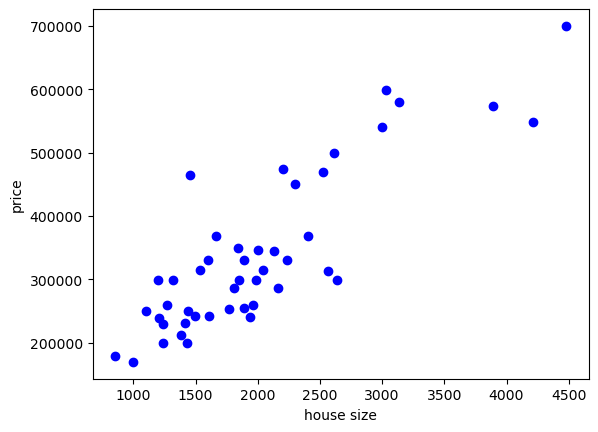

Training size: 36, Testing size: 10
Test cost:  [[2.6134157e+09]]
Parameters:  [[344561.60652712]
 [119489.10302237]
 [   583.02994868]]


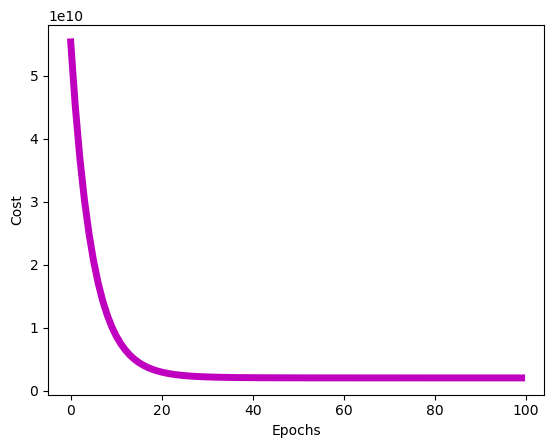

In [19]:
# Import & visualize

x, y = load_data("../../datasets/house_price/house_price_data.txt")

y = np.reshape(y, (46, 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4/5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 100
theta, J_all = gradient_descent(x_train, y_train, theta, learning_rate, num_epochs)

# Test
J = cost_function(x_test, y_test, theta)
print("Test cost: ", J)
print("Parameters: ", theta)

# plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

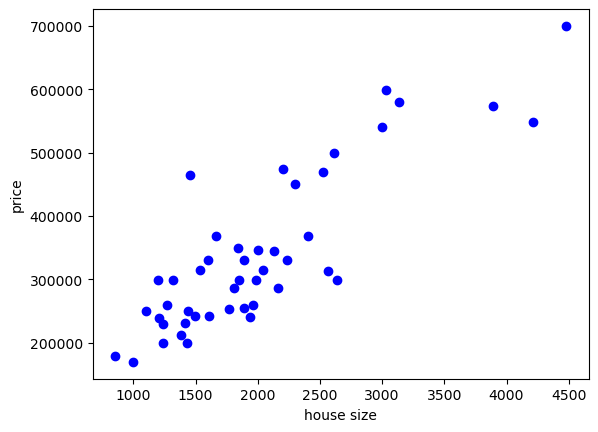

Training size: 36, Testing size: 10
Round 0, theta: [[142153.02476647]
 [ 70606.9166762 ]
 [ 38426.76806205]]
Test cost:  [[1.69177587e+10]]
Round 1, theta: [[222417.92700011]
 [ 91097.05407967]
 [ 46981.9478634 ]]
Test cost:  [[7.63020418e+09]]
Round 2, theta: [[268970.03507315]
 [ 96257.93877277]
 [ 45773.78577067]]
Test cost:  [[4.75730981e+09]]
Round 3, theta: [[296471.91373262]
 [ 97311.49828028]
 [ 41819.4529339 ]]
Test cost:  [[3.70569687e+09]]
Round 4, theta: [[312934.38617579]
 [ 97606.65120324]
 [ 37503.79104948]]
Test cost:  [[3.26210299e+09]]
Round 5, theta: [[322890.48476975]
 [ 97975.73513858]
 [ 33577.77242902]]
Test cost:  [[3.03996062e+09]]
Round 6, theta: [[328967.11674077]
 [ 98516.73183887]
 [ 30223.08857465]]
Test cost:  [[2.90557473e+09]]
Round 7, theta: [[332710.67656602]
 [ 99158.03643135]
 [ 27430.41425791]]
Test cost:  [[2.81103742e+09]]
Round 8, theta: [[335041.04133028]
 [ 99819.77977274]
 [ 25133.39554476]]
Test cost:  [[2.73845542e+09]]
Round 9, theta: [[3

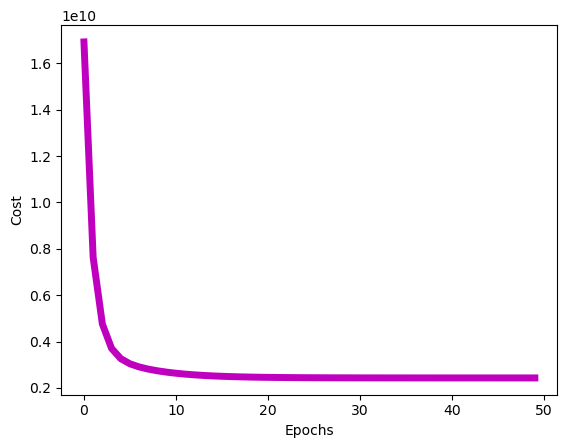

In [27]:
np.random.seed(0)
num_device = 1
per_device_size = [int(np.random.normal(20, 1)) for _ in range(num_device)]

# Import & visualize
x, y = load_data("../../datasets/house_price/house_price_data.txt")
y = np.reshape(y, (46, 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4 / 5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

# Partition
per_device_idx = [np.random.choice(train_size, size=per_device_size[i]) for i in range(num_device)]
x_data_device = [x_train[per_device_idx[i], :] for i in range(num_device)]
y_data_device = [y_train[per_device_idx[i], :] for i in range(num_device)]

theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 5
num_round = 50

J_test = []

for i in range(num_round):
    theta_next = np.zeros((x.shape[1], 1))
    for j in range(num_device):
        theta_local, _ = gradient_descent(x_data_device[j], y_data_device[j], theta, learning_rate, num_epochs)
        theta_next += theta_local

    theta_next /= num_device
    theta = theta_next
    print(f"Round {i}, theta: {theta}")

    # Test
    J = cost_function(x_test, y_test, theta)
    J_test.append(J)
    print("Test cost: ", J)

# plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_test:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)